### Importing all libraries/functions.

In [1]:
from qiskit import *

### Creating two qubits and 2 classical bits.

In [2]:
qr = QuantumRegister(2) # create 2 qubits register
cr = ClassicalRegister(2) # create 2 bits classical register to store measured values

### Creating a circuit with the above qubits and bits.

In [3]:
circuit = QuantumCircuit(qr,cr)

# Simplying the above three lines of code.
#circuit = QuantumCircuit(2,2)
# where the first argument is the number of quantum bits, and the second argument is the number of classical bits. This is the recommended way of creating circuits.

### Let's see how the circuit looks!

In [4]:
circuit.draw()

### Adding a Hadamard Gate to qubit q0_0. It puts the qubit in superposition state (a state where it is both 1 and 0).

In [5]:
circuit.h(qr[0])

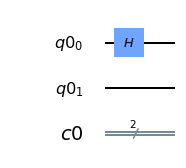

In [6]:
circuit.draw(output='mpl')

### Lets add a controlled-not gate (cx) which is nothing but a if-then gate. It consists of a control bit(c) and target bit(t).
#### If control bit is 
#### '0', outputs target bit as it is
#### '1', outputs complement of target bit
#### O/P can be thought of as c xor t 

In [7]:
circuit.cx(qr[0],qr[1]) # qr[0] is the control bit, qr[1] is the target bit

### Let's see how the circuit looks now!

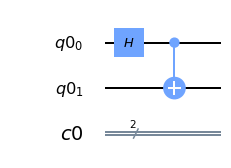

In [8]:
circuit.draw(output='mpl')

### We need to measure these qubits to store our outputs in a classical bit. 

In [9]:
circuit.measure(qr,cr) # Store the measured values from quantum register to classical regsiter.

### Circuit finally looks like the following

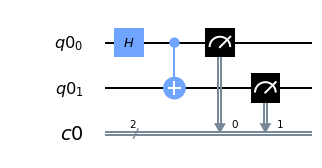

In [10]:
circuit.draw(output='mpl')

## _Noticing carefully, we can see that q0 and q1 qubits are entangled!_

## Now that we have a complete circuit, let us simulate it :

### 1. Local Simulation

#### a) Choose a local simulator and execute the circuit. Store the results.

In [14]:
simulator = Aer.get_backend('qasm_simulator') # From Qiskit's Aer package we select qasm (quantum assembly) simulator
result = execute(circuit,backend=simulator).result() # Execute our circuit with backend as the qasm simulator and store the results

#### b) Visualize the results

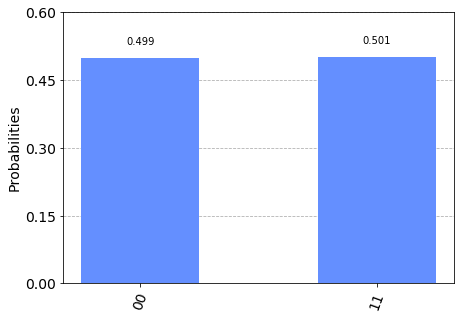

In [15]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

### 2. IBM Q - Actual Quantum Computation

### a) Connect to IBMQ quantum computer using API Key.

In [16]:
from qiskit import IBMQ # import functionalitites of IBMQ
IBMQ.save_account('2e8c99f806b3cf11fc9926a05110c50d1e3abc7d265a40f3e387a6464d5a4e2c64a69d7a4a07deec39791bf2bb024431ade689bb294444e05d75cffc79778950') # Use API Key provided by IBMQ to communicate with actual quantum computer

### b) Verify if your account has been loaded.

In [17]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### c) Now that our account has loaded correctly. We can need to connect to a quantum computer.

In [23]:
provider = IBMQ.get_provider('ibm-q') # selects a service provider
qcomp = provider.get_backend('ibmq_london')# https://quantum-computing.ibm.com/ ---> Dashboard ---> List of Backends are available ----> select anyone according to need.


### d) Execute our circuit

In [24]:
job = execute(circuit,backend=qcomp) # schedule a job in the quatum computer. This job is then moved to a job queue. Same circuit created for local simulation is used again.

In [25]:
from qiskit.tools.monitor import job_monitor
job_monitor(job) # status of the job is fetched. ex. Queued, Running , Successfully run 

Job Status: job has successfully run


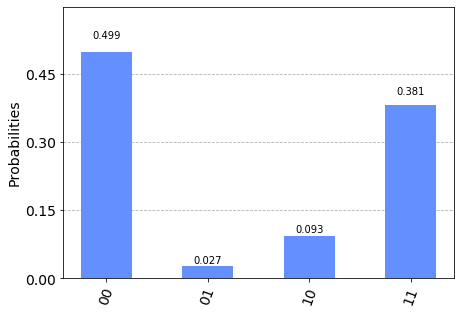

In [26]:
result = job.result()
plot_histogram(result.get_counts(circuit))

## _Difference between the results of simulator and actual quantum computer are the 01,10 states. A simulator gives perfect result(values expected theoretically) but in actual quantum computers there are certain percetage of errors. States 01,10 are errors quantum errors in the above result. Quantum error correction reduces these errors._